In [137]:
import os
import pandas as pd
import openai
import openai
from dotenv import load_dotenv
import json
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
import matplotlib.patches as mpatches
import random
import matplotlib.colors as mcolors
from collections import defaultdict


In [138]:
# Load environment variables from .env file
load_dotenv()
openai.api_key = os.environ.get('OPENAI_API_KEY')
openai.organization = '' 

In [140]:

document = 'C:\\Users\\dedbl\\Documents\\anniedilliard\\chapters\\knot.txt'
with open(document, "r") as file:
    document = file.read()

In [148]:
prompt = """Given a document, extrapolate entities and the relationships between each pair of entities. Consider relations between many entities,
not just a core, dominant one.

Output these in the format of a python dictionary, which can be converted using json, as follows:
{
    "entities": [
        {"text": "Entity1", "type": "Type1"},
        {"text": "Entity2", "type": "Type2"},
    ],
"relationships": [
        {"source": "Entity1", "target": "Entity2", "relation": "Relation1"},
        {"source": "Entity2", "target": "Entity3", "relation": "Relation2"}
    ]
}

Document =   """ + document

questions = openai.ChatCompletion.create(
        model = "gpt-4",
        messages=[{"role": "user", "content": prompt}],
        max_tokens = 2000,
        temperature = 0
        )
knowledge = questions["choices"][0]["message"]["content"]
knowledge = json.loads(knowledge)

In [142]:

print(knowledge)

{'entities': [{'text': 'I', 'type': 'Person'}, {'text': 'new season', 'type': 'Time'}, {'text': 'snakeskin', 'type': 'Object'}, {'text': 'February woods', 'type': 'Location'}, {'text': 'quarry', 'type': 'Location'}, {'text': 'aquarium', 'type': 'Object'}, {'text': 'snake', 'type': 'Animal'}, {'text': 'forest floor', 'type': 'Location'}, {'text': 'kitchen table', 'type': 'Object'}, {'text': 'neighborhood boys', 'type': 'Person'}, {'text': 'quarry pond', 'type': 'Location'}, {'text': 'skunk cabbage', 'type': 'Plant'}, {'text': 'Annie Dillard', 'type': 'Person'}, {'text': 'spring', 'type': 'Time'}, {'text': 'winter frost', 'type': 'Weather'}, {'text': 'grass', 'type': 'Plant'}, {'text': 'Nebuchadnezzar', 'type': 'Person'}, {'text': 'Genesis', 'type': 'Literature'}, {'text': 'God', 'type': 'Deity'}, {'text': 'human culture', 'type': 'Culture'}, {'text': 'Van Gogh', 'type': 'Person'}, {'text': 'Tinker Creek', 'type': 'Location'}, {'text': 'Peru', 'type': 'Location'}, {'text': 'weather', 'ty

In [143]:
def view_directed_knowledgegraph(knowledge_graph):
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes to the graph
    for entity in knowledge_graph['entities']:
        G.add_node(entity['text'], type=entity['type'])

    # Add edges to the graph
    for rel in knowledge_graph['relationships']:
        G.add_edge(rel['source'], rel['target'], relation=rel['relation'])

    # Set node positions for visualization
    pos = nx.spring_layout(G, seed=42)

    # Draw the graph
    fig, ax = plt.subplots(figsize=(14, 10))
    nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=8, font_weight='bold', arrowsize=15, arrowstyle='fancy', width=1.0, edge_color='gray', ax=ax)
    edge_labels = nx.get_edge_attributes(G, 'relation')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='black', bbox=dict(boxstyle='round,pad=0.2', edgecolor='gray', facecolor='white', alpha=0.9), ax=ax)

    # Show the visualization
    plt.title("Directed Knowledge Graph Visualization")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [149]:
type(knowledge)
knowledge['relationships']

[{'source': 'I', 'target': 'new season', 'relation': 'set out to catch'},
 {'source': 'I', 'target': 'snakeskin', 'relation': 'found'},
 {'source': 'I', 'target': 'February woods', 'relation': 'was in'},
 {'source': 'snake', 'target': 'aquarium', 'relation': 'found it handy'},
 {'source': 'snake', 'target': 'snakeskin', 'relation': 'shed'},
 {'source': 'I',
  'target': 'nonpoisonous snake',
  'relation': 'identified snakeskin'},
 {'source': 'I', 'target': 'kitchen table', 'relation': 'placed snakeskin on'},
 {'source': 'neighborhood boys',
  'target': 'snakeskin',
  'relation': 'possibly tied'},
 {'source': 'I', 'target': 'quarry pond', 'relation': 'saw'},
 {'source': 'I', 'target': 'skunk cabbage', 'relation': 'saw'},
 {'source': 'I', 'target': 'spring', 'relation': 'wants to catch'},
 {'source': 'I',
  'target': 'winter frost',
  'relation': 'wants to distinguish from spring frost'},
 {'source': 'I', 'target': 'grass', 'relation': 'wants to see turn green'},
 {'source': 'I', 'target'

In [150]:

def assign_colors_to_entities(knowledge, palette=True, colours=None):
    if colours is None:
        # this is the default palette to use
        colours = ["#e60049", "#0bb4ff", "#50e991", "#e6d800", "#9b19f5", "#ffa300", "#dc0ab4", "#b3d4ff", "#00bfa0"]

    # Create a dictionary to store entity types and corresponding colors
    if palette:
        type_to_color = defaultdict(lambda: random.choice(colours))
    else:
        type_to_color = defaultdict(lambda: mcolors.CSS4_COLORS[random.choice(list(mcolors.CSS4_COLORS.keys()))])

    # Update the entities list with assigned colors
    updated_entities = []
    for entity in knowledge['entities']:
        entity_type = entity["type"]
        color = type_to_color[entity_type]
        entity["color"] = color
        updated_entities.append(entity)

    knowledge['entities'] = updated_entities

assign_colors_to_entities(knowledge, palette=True)


Updated entities:
[{'text': 'I', 'type': 'Person', 'color': '#e6d800'}, {'text': 'new season', 'type': 'Time', 'color': '#00bfa0'}, {'text': 'snakeskin', 'type': 'Object', 'color': '#00bfa0'}, {'text': 'February woods', 'type': 'Location', 'color': '#b3d4ff'}, {'text': 'quarry', 'type': 'Location', 'color': '#b3d4ff'}, {'text': 'aquarium', 'type': 'Object', 'color': '#00bfa0'}, {'text': 'snake', 'type': 'Animal', 'color': '#e6d800'}, {'text': 'forest floor', 'type': 'Location', 'color': '#b3d4ff'}, {'text': 'nonpoisonous snake', 'type': 'Animal', 'color': '#e6d800'}, {'text': 'kitchen table', 'type': 'Object', 'color': '#00bfa0'}, {'text': 'neighborhood boys', 'type': 'Group', 'color': '#e6d800'}, {'text': 'quarry pond', 'type': 'Location', 'color': '#b3d4ff'}, {'text': 'skunk cabbage', 'type': 'Plant', 'color': '#e60049'}, {'text': 'spring', 'type': 'Time', 'color': '#00bfa0'}, {'text': 'winter frost', 'type': 'Weather', 'color': '#b3d4ff'}, {'text': 'grass', 'type': 'Plant', 'color':

In [161]:
def view_directed_knowledgegraph_colour(knowledge_graph, title = 'Knowledge graph'):
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes to the graph with dynamically assigned colors
    for entity in knowledge_graph['entities']:
        G.add_node(entity['text'], type=entity['type'], color=entity['color'])

    # Add edges to the graph
    for rel in knowledge_graph['relationships']:
        G.add_edge(rel['source'], rel['target'], relation=rel['relation'])

    # Set node positions for visualization
    pos  = nx.spring_layout(G, seed=42)#shell_layout(G)#nx.kamada_kawai_layout(G)#nx.spring_layout(G, seed=42)

    # Draw the graph
    fig, ax = plt.subplots(figsize=(18, 14))
    
    # Extract node colors from node attributes
    node_colors = [node[1].get('color', 'skyblue') for node in G.nodes(data=True)]
    
    # Add a legend with entity types and their colors
    legend_labels = {entity['type']: mcolors.ColorConverter.to_rgb(entity['color']) for entity in knowledge_graph['entities']}
    ax.legend(handles=[mpatches.Patch(color=color, label=entity_type) for entity_type, color in legend_labels.items()])
    
    nx.draw(G, pos, with_labels=True, node_size=1500, node_color=node_colors, font_size=8, font_weight='bold', arrowsize=15, arrowstyle='fancy', width=0.5, edge_color='gray', ax=ax)
    
    edge_labels = nx.get_edge_attributes(G, 'relation')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='black', bbox=dict(boxstyle='round,pad=0.4', edgecolor='gray', facecolor='white', alpha=0.9), ax=ax)

    # Show the visualization
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()


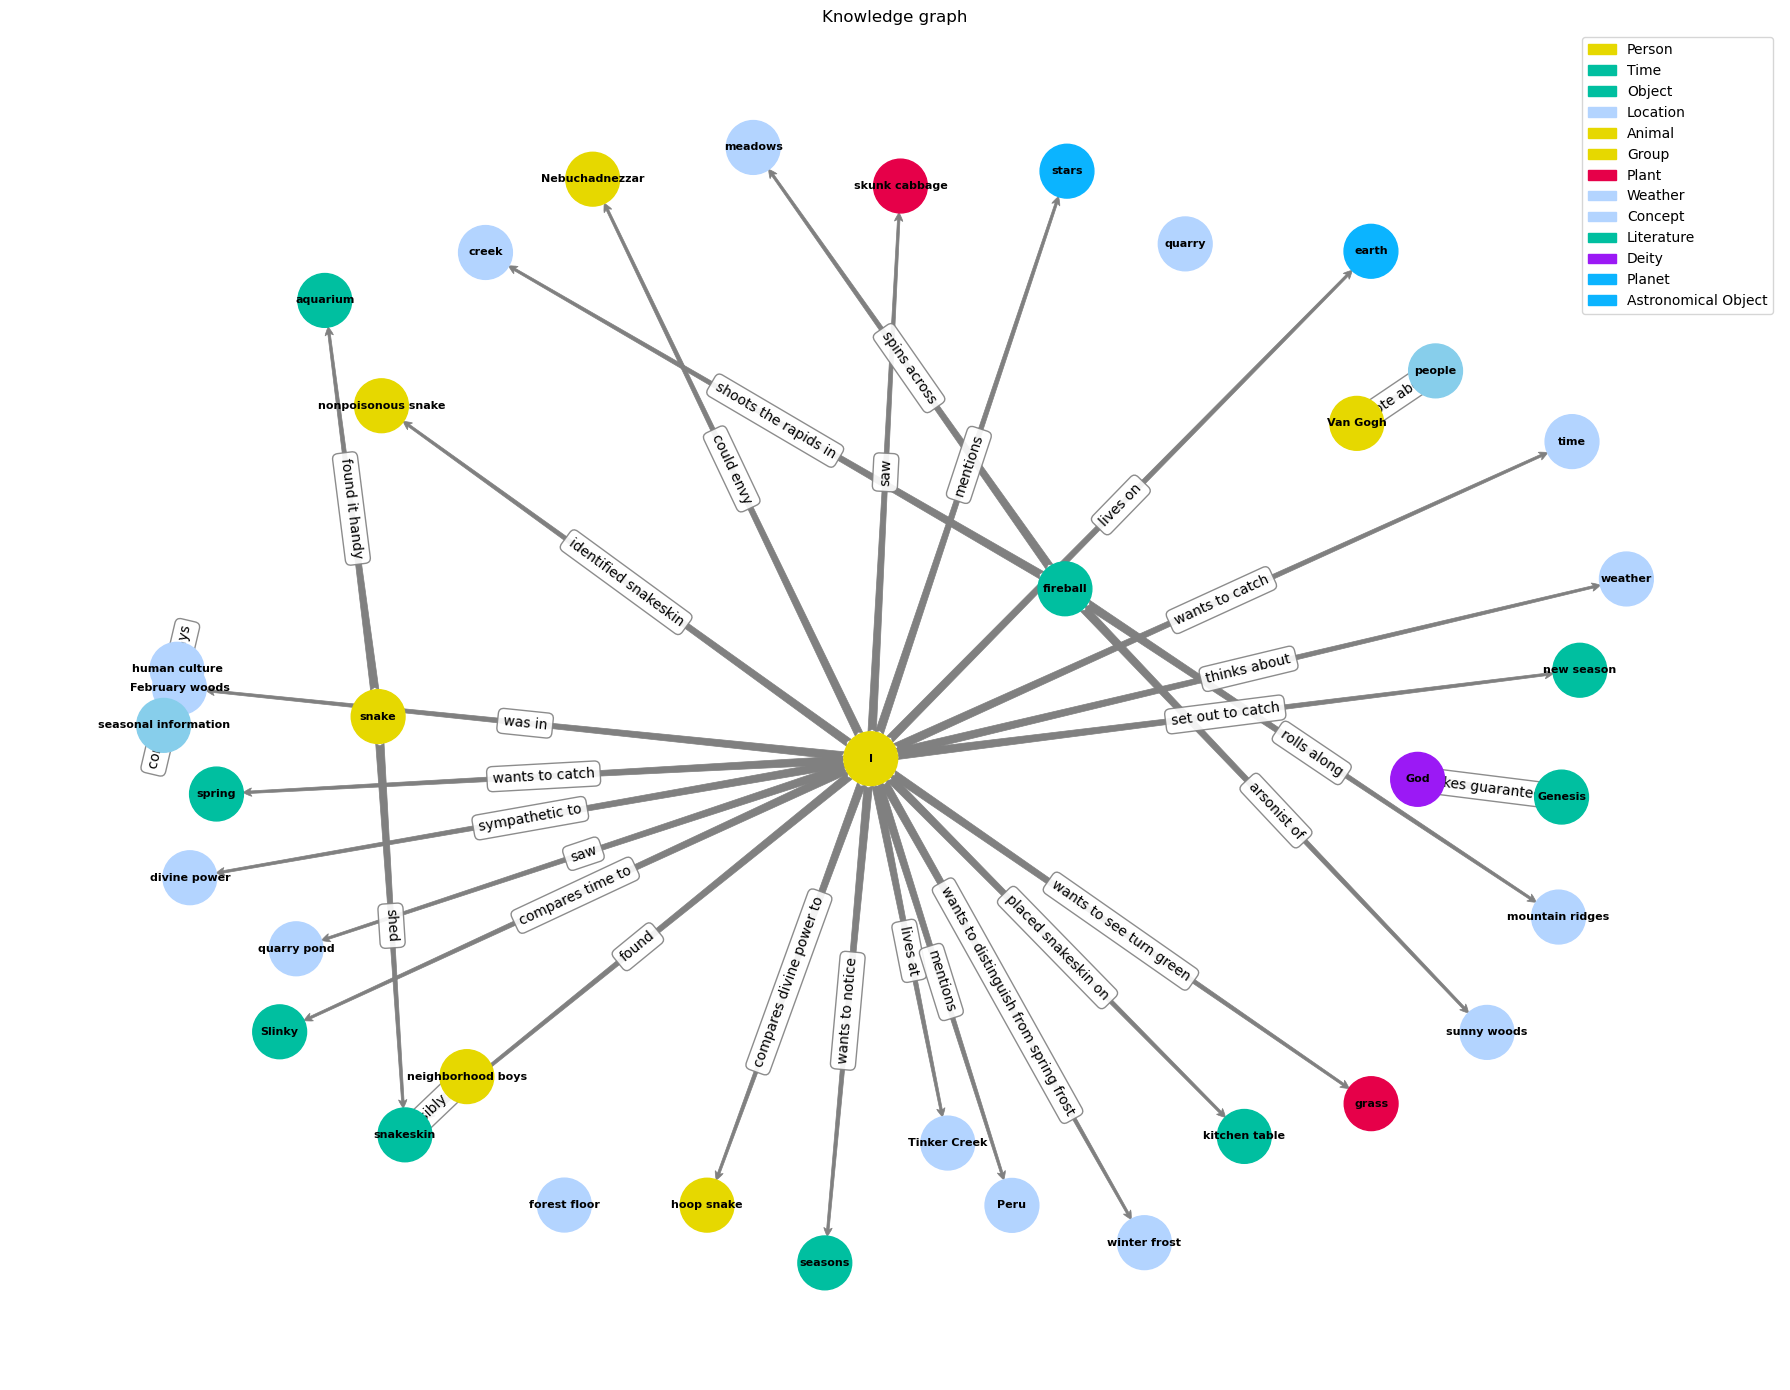

In [162]:
view_directed_knowledgegraph_colour(knowledge)